In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('Company_Data.csv')
data1 = data.copy()

In [3]:
data1.shape

(400, 11)

In [4]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [5]:
data1.describe().T

count        mean         std   min     25%     50%     75%  \
Sales        400.0    7.496325    2.824115   0.0    5.39    7.49    9.32   
CompPrice    400.0  124.975000   15.334512  77.0  115.00  125.00  135.00   
Income       400.0   68.657500   27.986037  21.0   42.75   69.00   91.00   
Advertising  400.0    6.635000    6.650364   0.0    0.00    5.00   12.00   
Population   400.0  264.840000  147.376436  10.0  139.00  272.00  398.50   
Price        400.0  115.795000   23.676664  24.0  100.00  117.00  131.00   
Age          400.0   53.322500   16.200297  25.0   39.75   54.50   66.00   
Education    400.0   13.900000    2.620528  10.0   12.00   14.00   16.00   

                max  
Sales         16.27  
CompPrice    175.00  
Income       120.00  
Advertising   29.00  
Population   509.00  
Price        191.00  
Age           80.00  
Education     18.00

In [6]:
data1[data1.duplicated()]

Empty DataFrame
Columns: [Sales, CompPrice, Income, Advertising, Population, Price, ShelveLoc, Age, Education, Urban, US]
Index: []

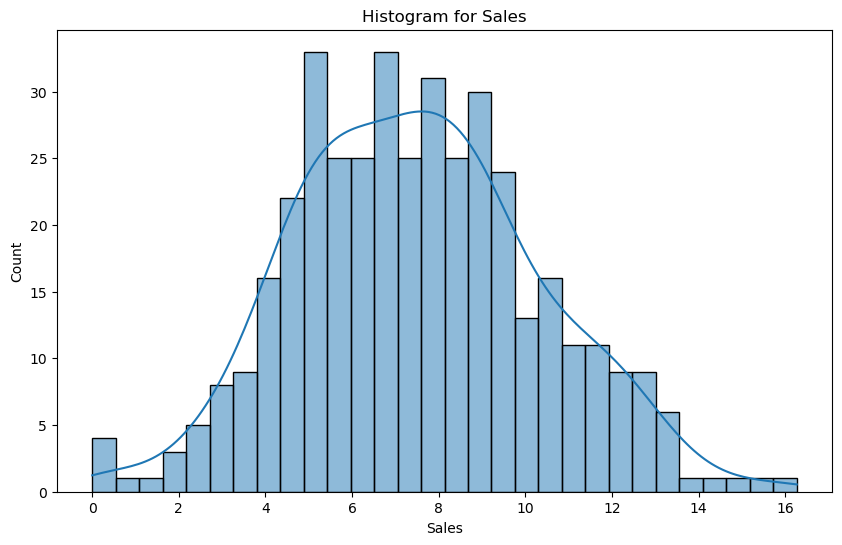

In [7]:
plt.figure(figsize=(10, 6))
sns.histplot(data1['Sales'], bins=30, kde=True)
plt.title('Histogram for Sales')
plt.show()

In [8]:
quartiles = np.percentile(data1['Sales'], [25, 50, 75])
print(f'Quartiles: Q1={quartiles[0]}, Q2={quartiles[1]}, Q3={quartiles[2]}')

Quartiles: Q1=5.390000000000001, Q2=7.49, Q3=9.32


In [9]:
# Convert Sales to categorical variable
data1['Sales_Category'] = pd.qcut(data1['Sales'], q=3, labels=['Low', 'Medium', 'High'])
data1.head()

Sales  CompPrice  Income  Advertising  Population  Price ShelveLoc  Age  \
0   9.50        138      73           11         276    120       Bad   42   
1  11.22        111      48           16         260     83      Good   65   
2  10.06        113      35           10         269     80    Medium   59   
3   7.40        117     100            4         466     97    Medium   55   
4   4.15        141      64            3         340    128       Bad   38   

   Education Urban   US Sales_Category  
0         17   Yes  Yes           High  
1         10   Yes  Yes           High  
2         12   Yes  Yes           High  
3         14   Yes  Yes         Medium  
4         13   Yes   No            Low

In [10]:
data1.Sales_Category.value_counts()

Low       134
Medium    134
High      132
Name: Sales_Category, dtype: int64

In [11]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Sales           400 non-null    float64 
 1   CompPrice       400 non-null    int64   
 2   Income          400 non-null    int64   
 3   Advertising     400 non-null    int64   
 4   Population      400 non-null    int64   
 5   Price           400 non-null    int64   
 6   ShelveLoc       400 non-null    object  
 7   Age             400 non-null    int64   
 8   Education       400 non-null    int64   
 9   Urban           400 non-null    object  
 10  US              400 non-null    object  
 11  Sales_Category  400 non-null    category
dtypes: category(1), float64(1), int64(7), object(3)
memory usage: 35.0+ KB


In [12]:
categorical_features = data1.describe(include=["object",'category']).columns
categorical_features

Index(['ShelveLoc', 'Urban', 'US', 'Sales_Category'], dtype='object')

In [13]:
numerical_features = data1.describe(include=["int64","float64"]).columns
numerical_features

Index(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'Age', 'Education'],
      dtype='object')

### Univariate plots

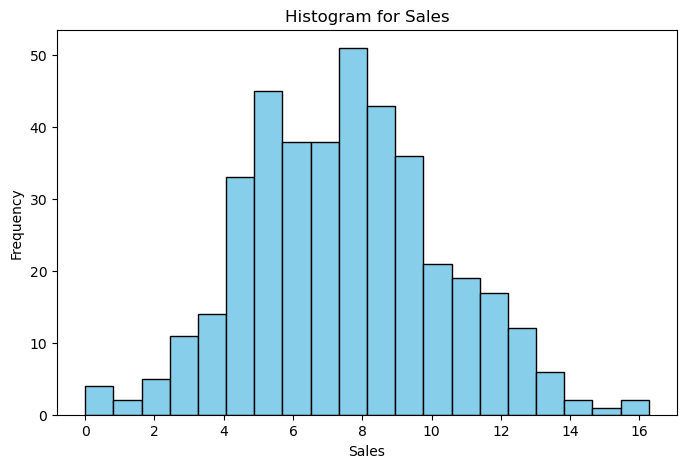

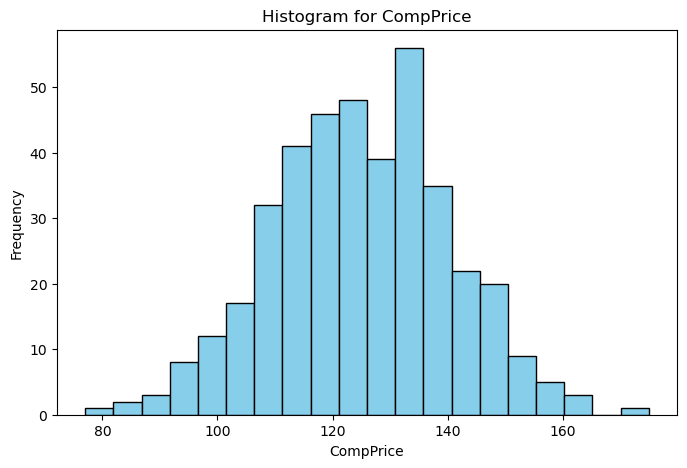

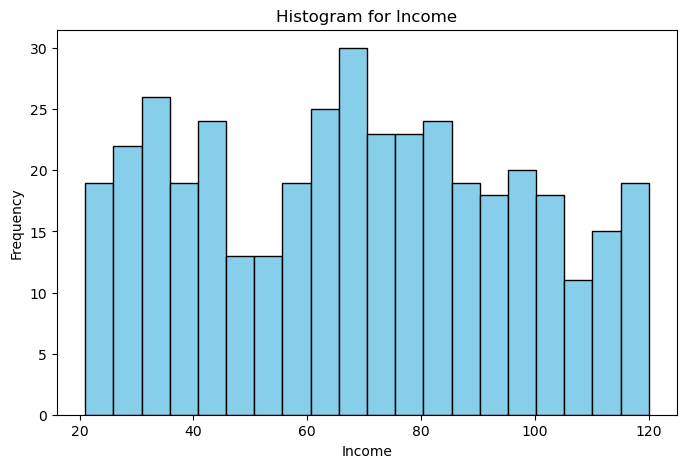

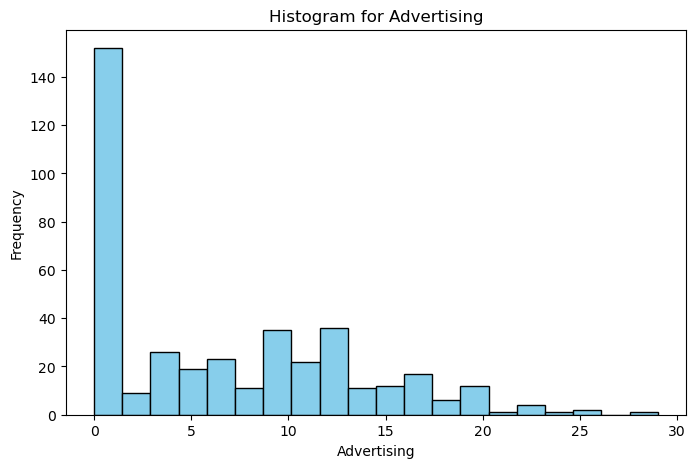

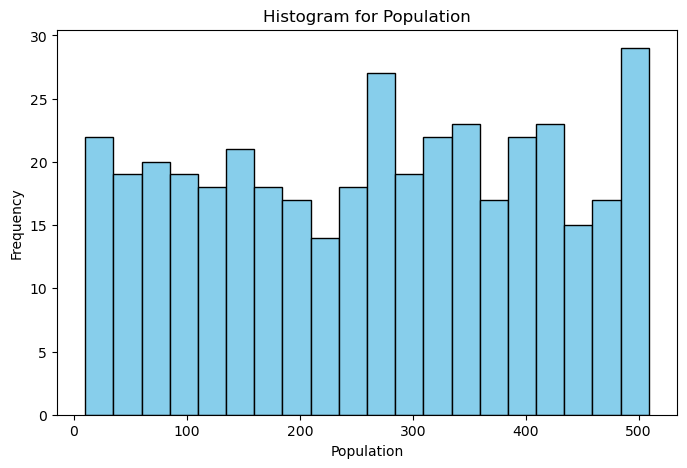

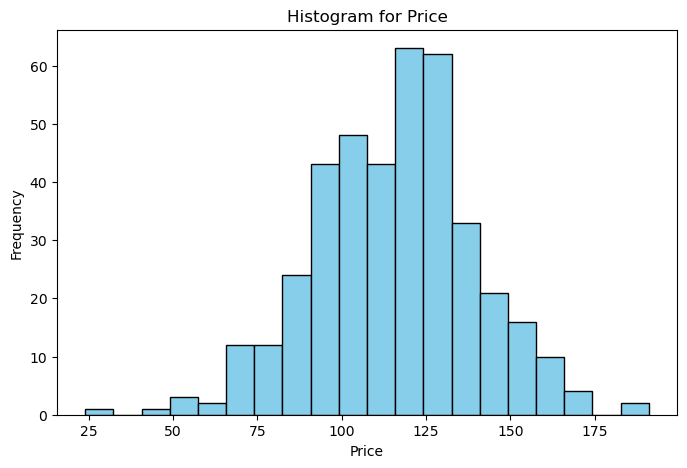

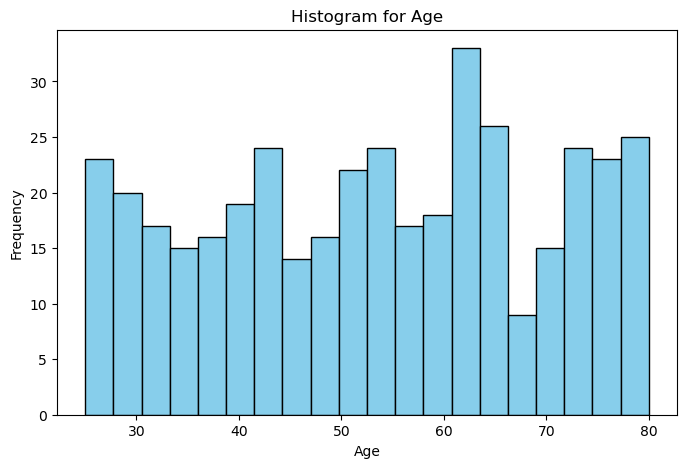

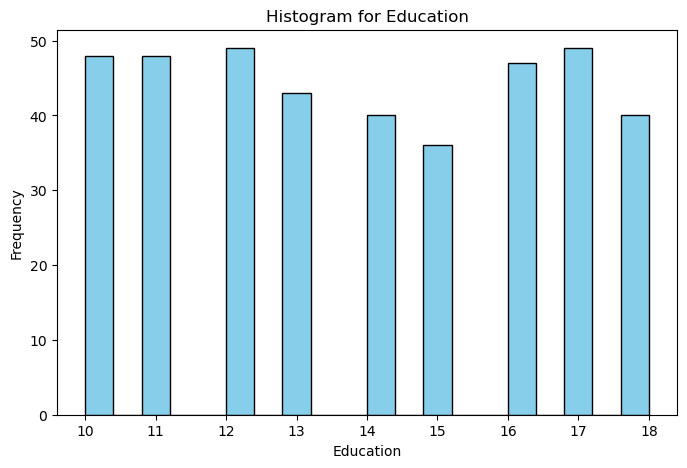

In [14]:
for feature in numerical_features:
    plt.figure(figsize=(8, 5))
    plt.hist(data[feature], bins=20, edgecolor='black', color='skyblue')
    plt.title(f'Histogram for {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

In [15]:
def detect_outliers(df, features):
    outliers = {}
    for feature in features:
        Q1 = df[feature].quantile(0.25)
        Q3 = df[feature].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        feature_outliers = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)][feature]
        outliers[feature] = feature_outliers
    return outliers

Outliers in Sales:
316    15.63
376    16.27
Name: Sales, dtype: float64
Outliers in CompPrice:
42      77
310    175
Name: CompPrice, dtype: int64
Outliers in Income:
Series([], Name: Income, dtype: int64)
Outliers in Advertising:
Series([], Name: Advertising, dtype: int64)
Outliers in Population:
Series([], Name: Population, dtype: int64)
Outliers in Price:
42      24
125     49
165    191
174    185
367     53
Name: Price, dtype: int64
Outliers in Age:
Series([], Name: Age, dtype: int64)
Outliers in Education:
Series([], Name: Education, dtype: int64)


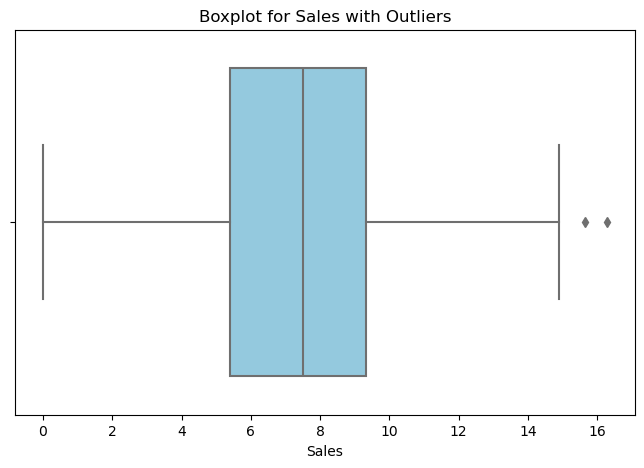

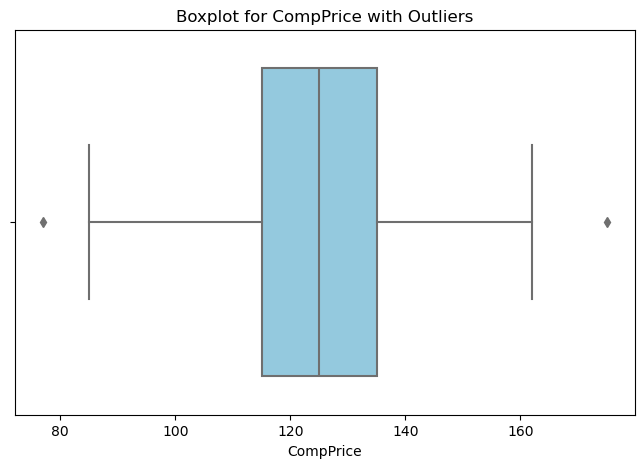

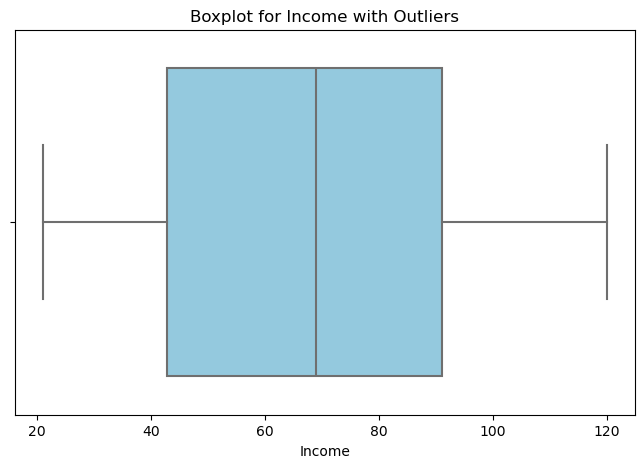

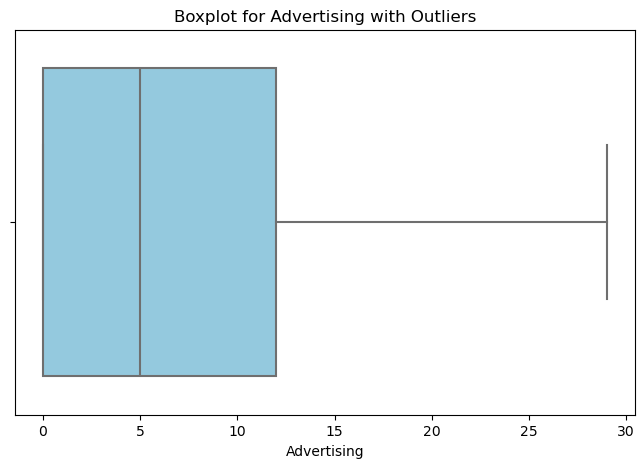

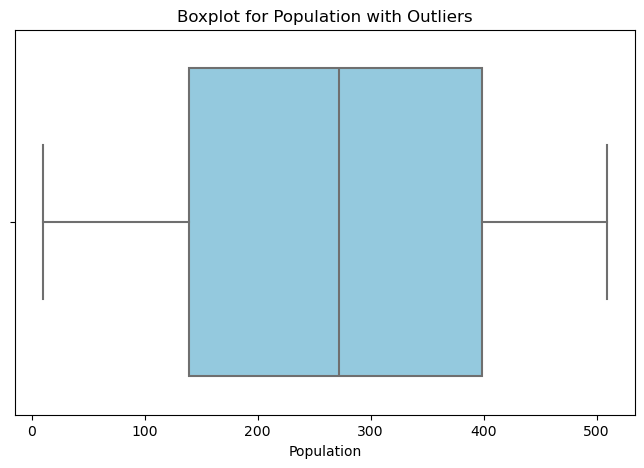

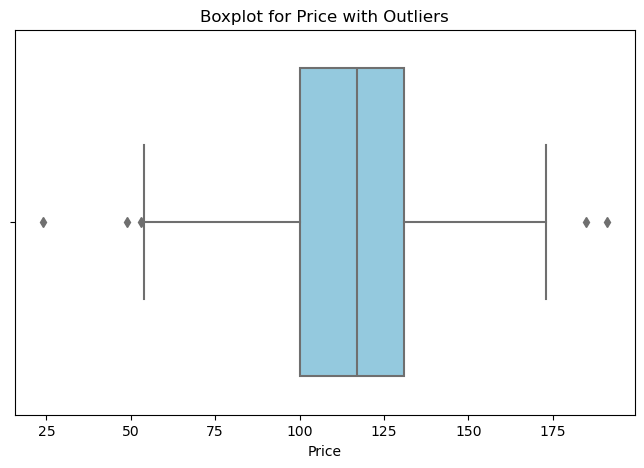

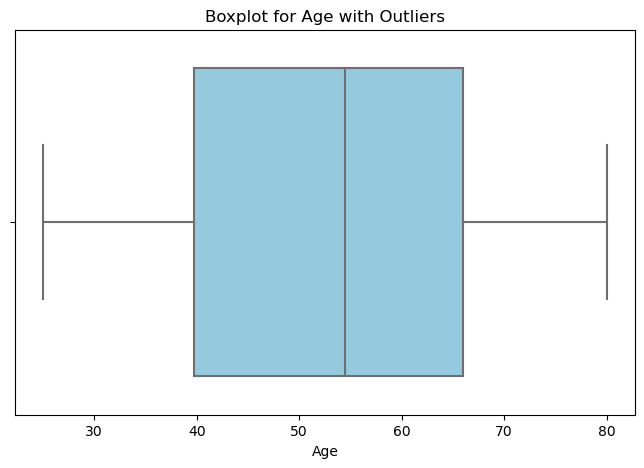

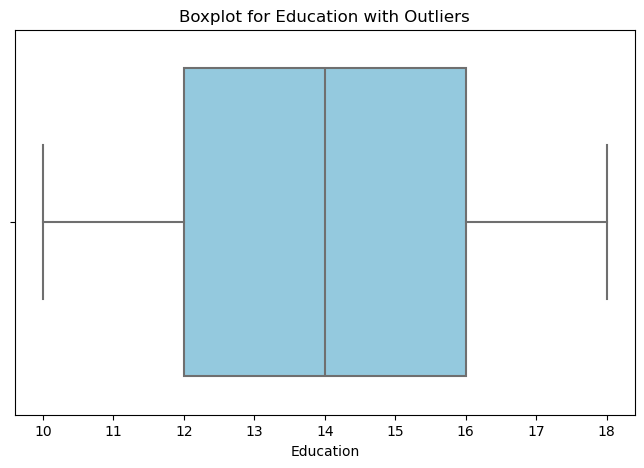

In [16]:
# Detect outliers
outliers = detect_outliers(data1, numerical_features)

# Print and visualize outliers
for feature, values in outliers.items():
    print(f'Outliers in {feature}:\n{values}')
    
# Visualize boxplots to highlight outliers
for feature in numerical_features:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x=data1[feature], color='skyblue')
    plt.title(f'Boxplot for {feature} with Outliers')
    plt.show()

<Axes: >

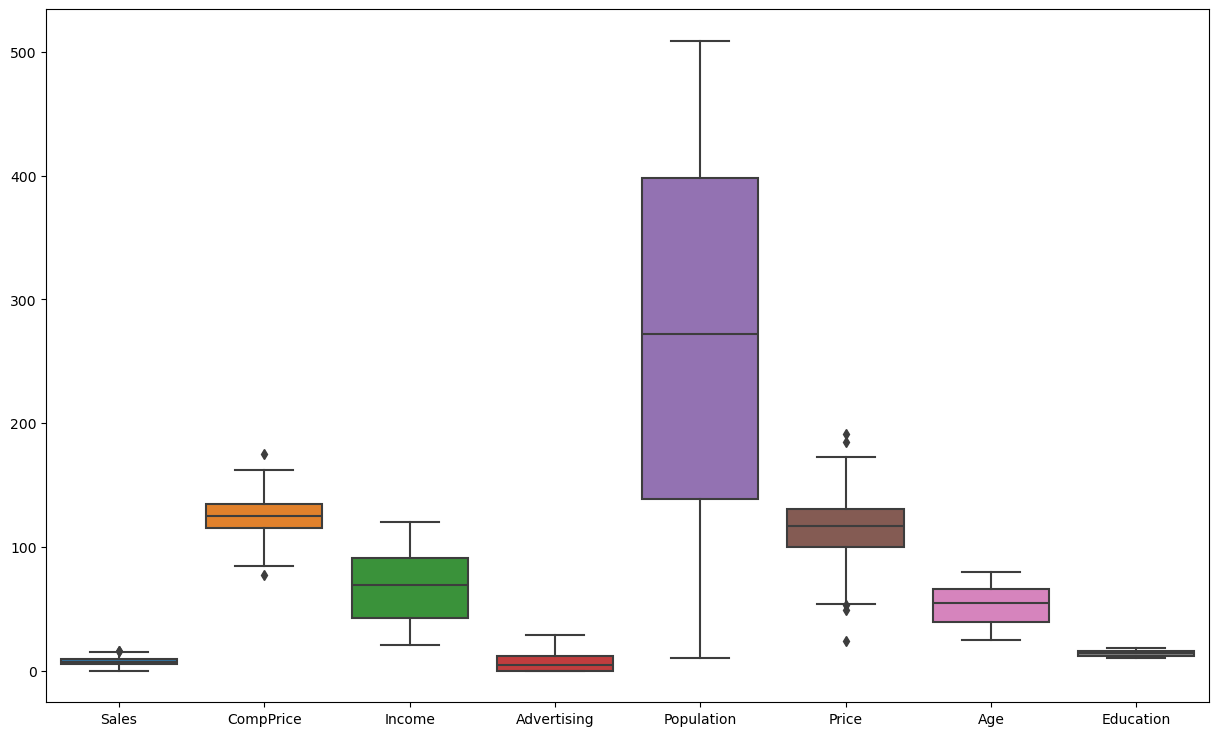

In [17]:
plt.figure(figsize=(15,9))
sns.boxplot(data=data1[numerical_features])

### Multivariate analysis

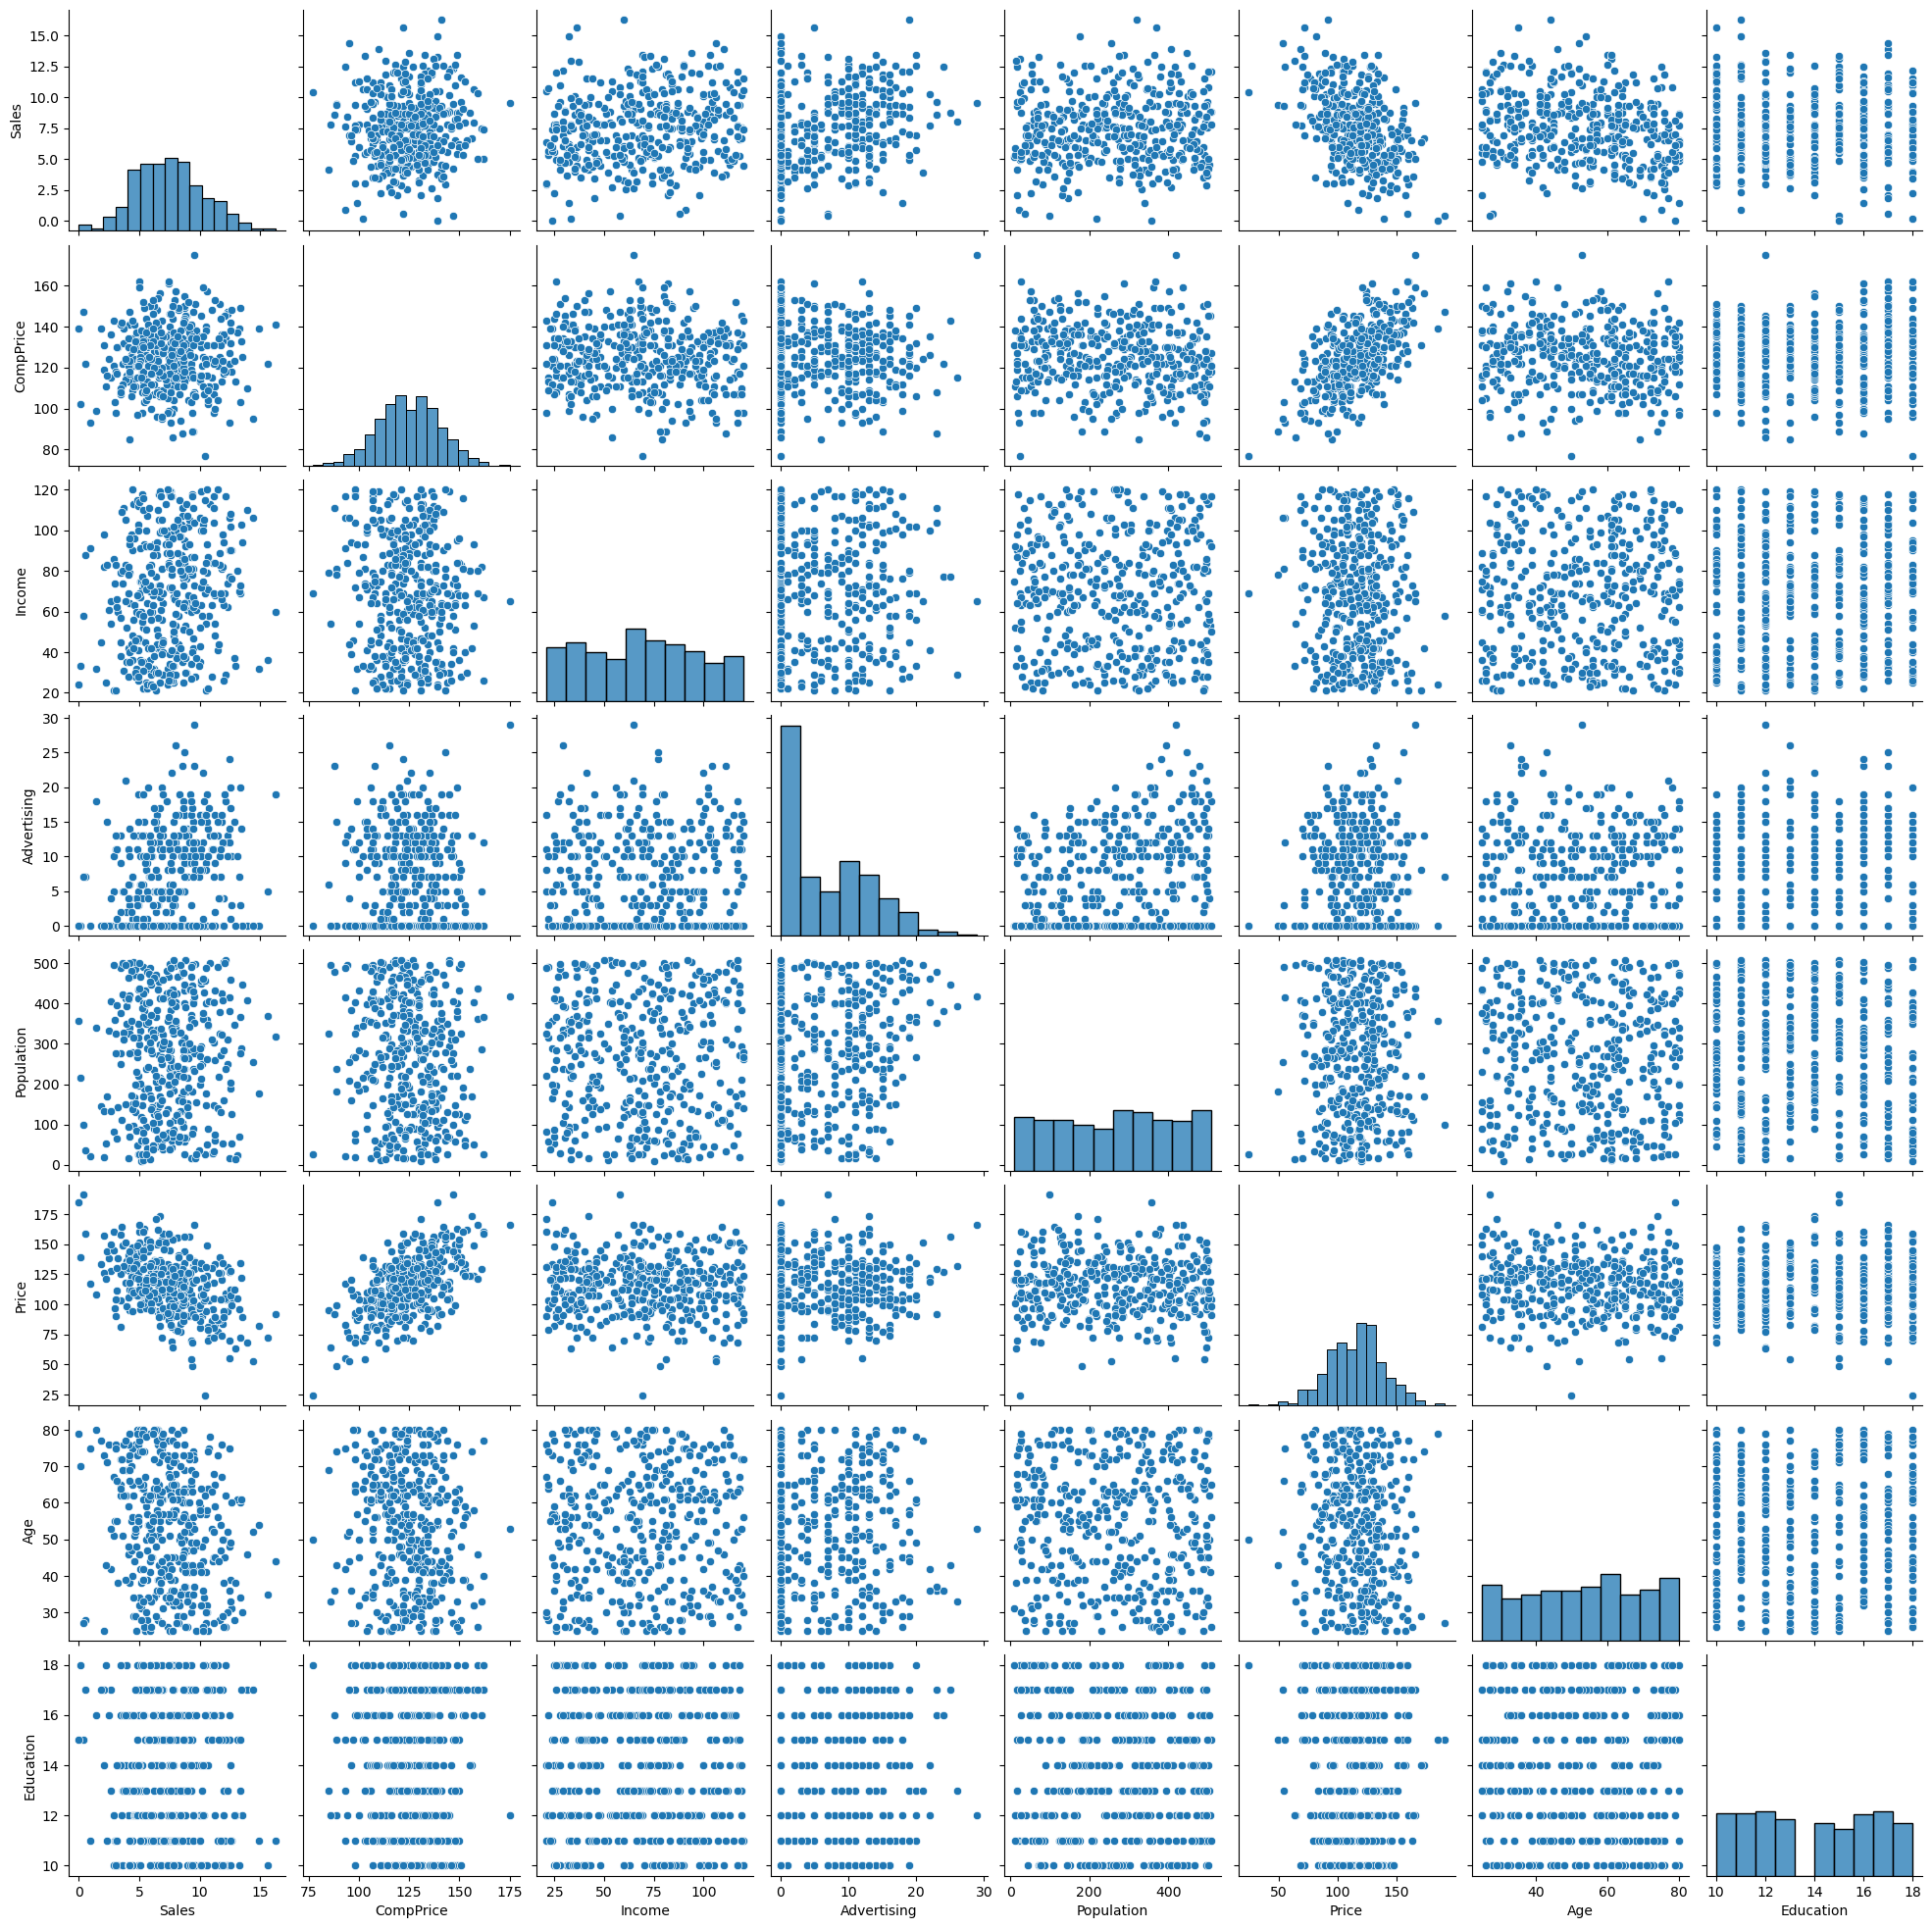

In [18]:
sns.pairplot(data1)

In [19]:
corr = data1.corr()
corr

Sales  CompPrice    Income  Advertising  Population     Price  \
Sales        1.000000   0.064079  0.151951     0.269507    0.050471 -0.444951   
CompPrice    0.064079   1.000000 -0.080653    -0.024199   -0.094707  0.584848   
Income       0.151951  -0.080653  1.000000     0.058995   -0.007877 -0.056698   
Advertising  0.269507  -0.024199  0.058995     1.000000    0.265652  0.044537   
Population   0.050471  -0.094707 -0.007877     0.265652    1.000000 -0.012144   
Price       -0.444951   0.584848 -0.056698     0.044537   -0.012144  1.000000   
Age         -0.231815  -0.100239 -0.004670    -0.004557   -0.042663 -0.102177   
Education   -0.051955   0.025197 -0.056855    -0.033594   -0.106378  0.011747   

                  Age  Education  
Sales       -0.231815  -0.051955  
CompPrice   -0.100239   0.025197  
Income      -0.004670  -0.056855  
Advertising -0.004557  -0.033594  
Population  -0.042663  -0.106378  
Price       -0.102177   0.011747  
Age          1.000000   0.006488  
Education    0.006488   1.000000

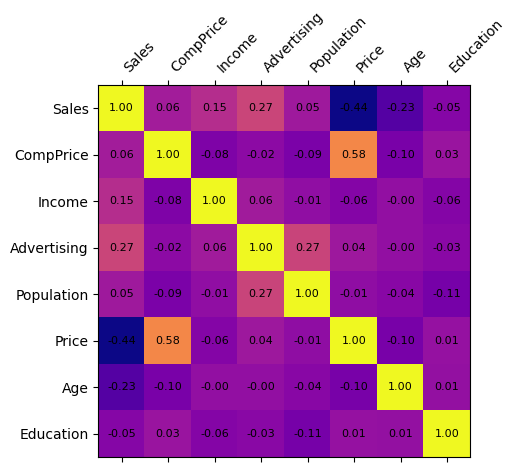

In [20]:
plt.matshow(corr, cmap='plasma')
column_names = corr.columns

for (i, j), z in np.ndenumerate(corr):
    plt.text(j, i, "{:0.2f}".format(z), ha="center", va="center",
             fontdict={'fontsize': 8})

plt.xticks(range(len(column_names)), column_names, rotation=45, ha='left')
plt.yticks(range(len(column_names)), column_names)

plt.show()

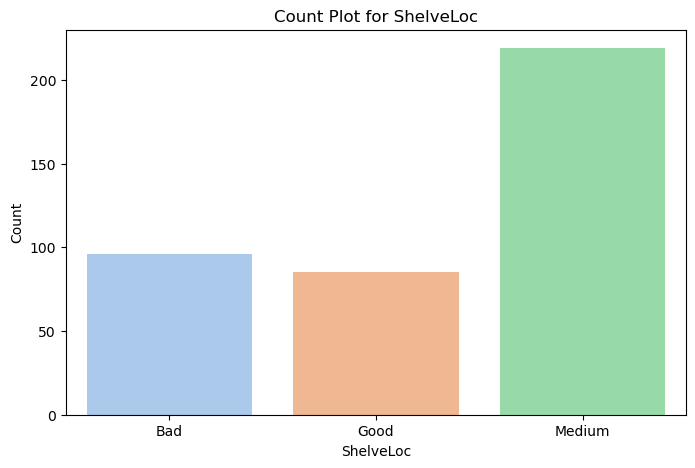

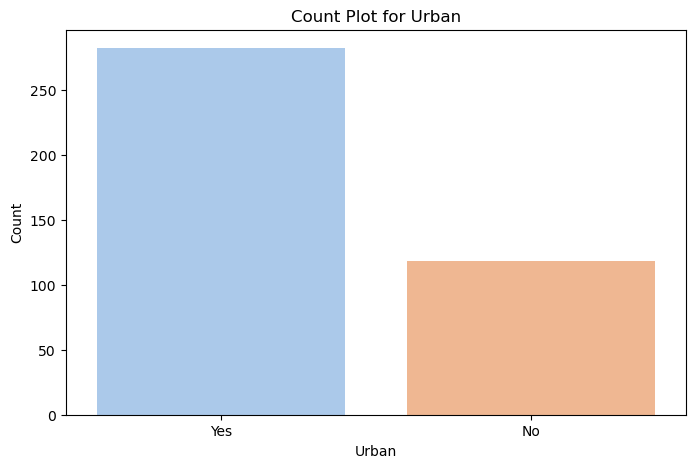

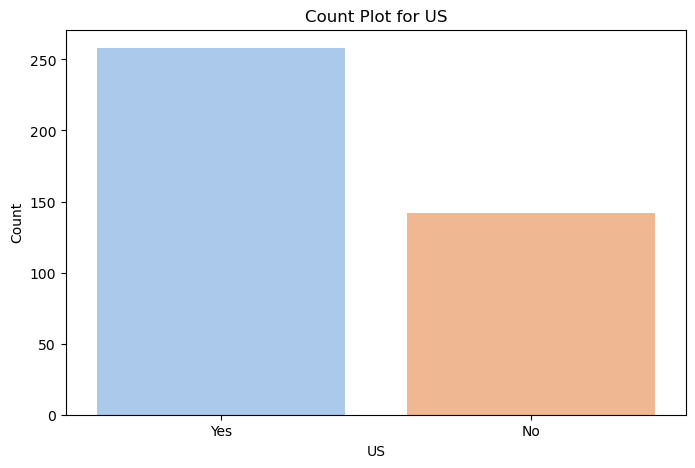

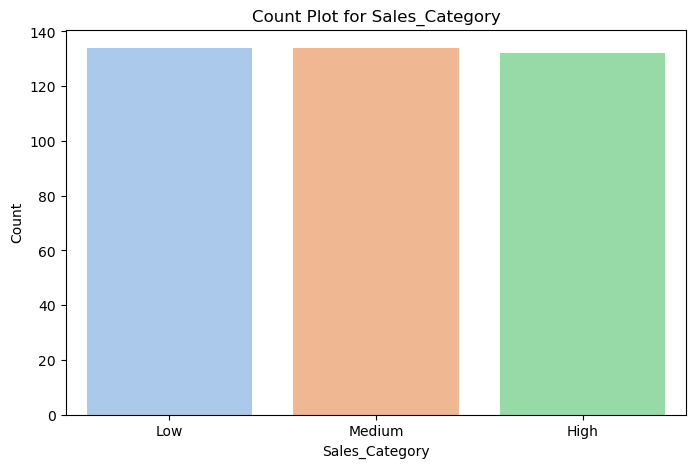

In [21]:
for feature in categorical_features:
    plt.figure(figsize=(8, 5))
    sns.countplot(x=feature, data=data1, palette='pastel')
    plt.title(f'Count Plot for {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.show()

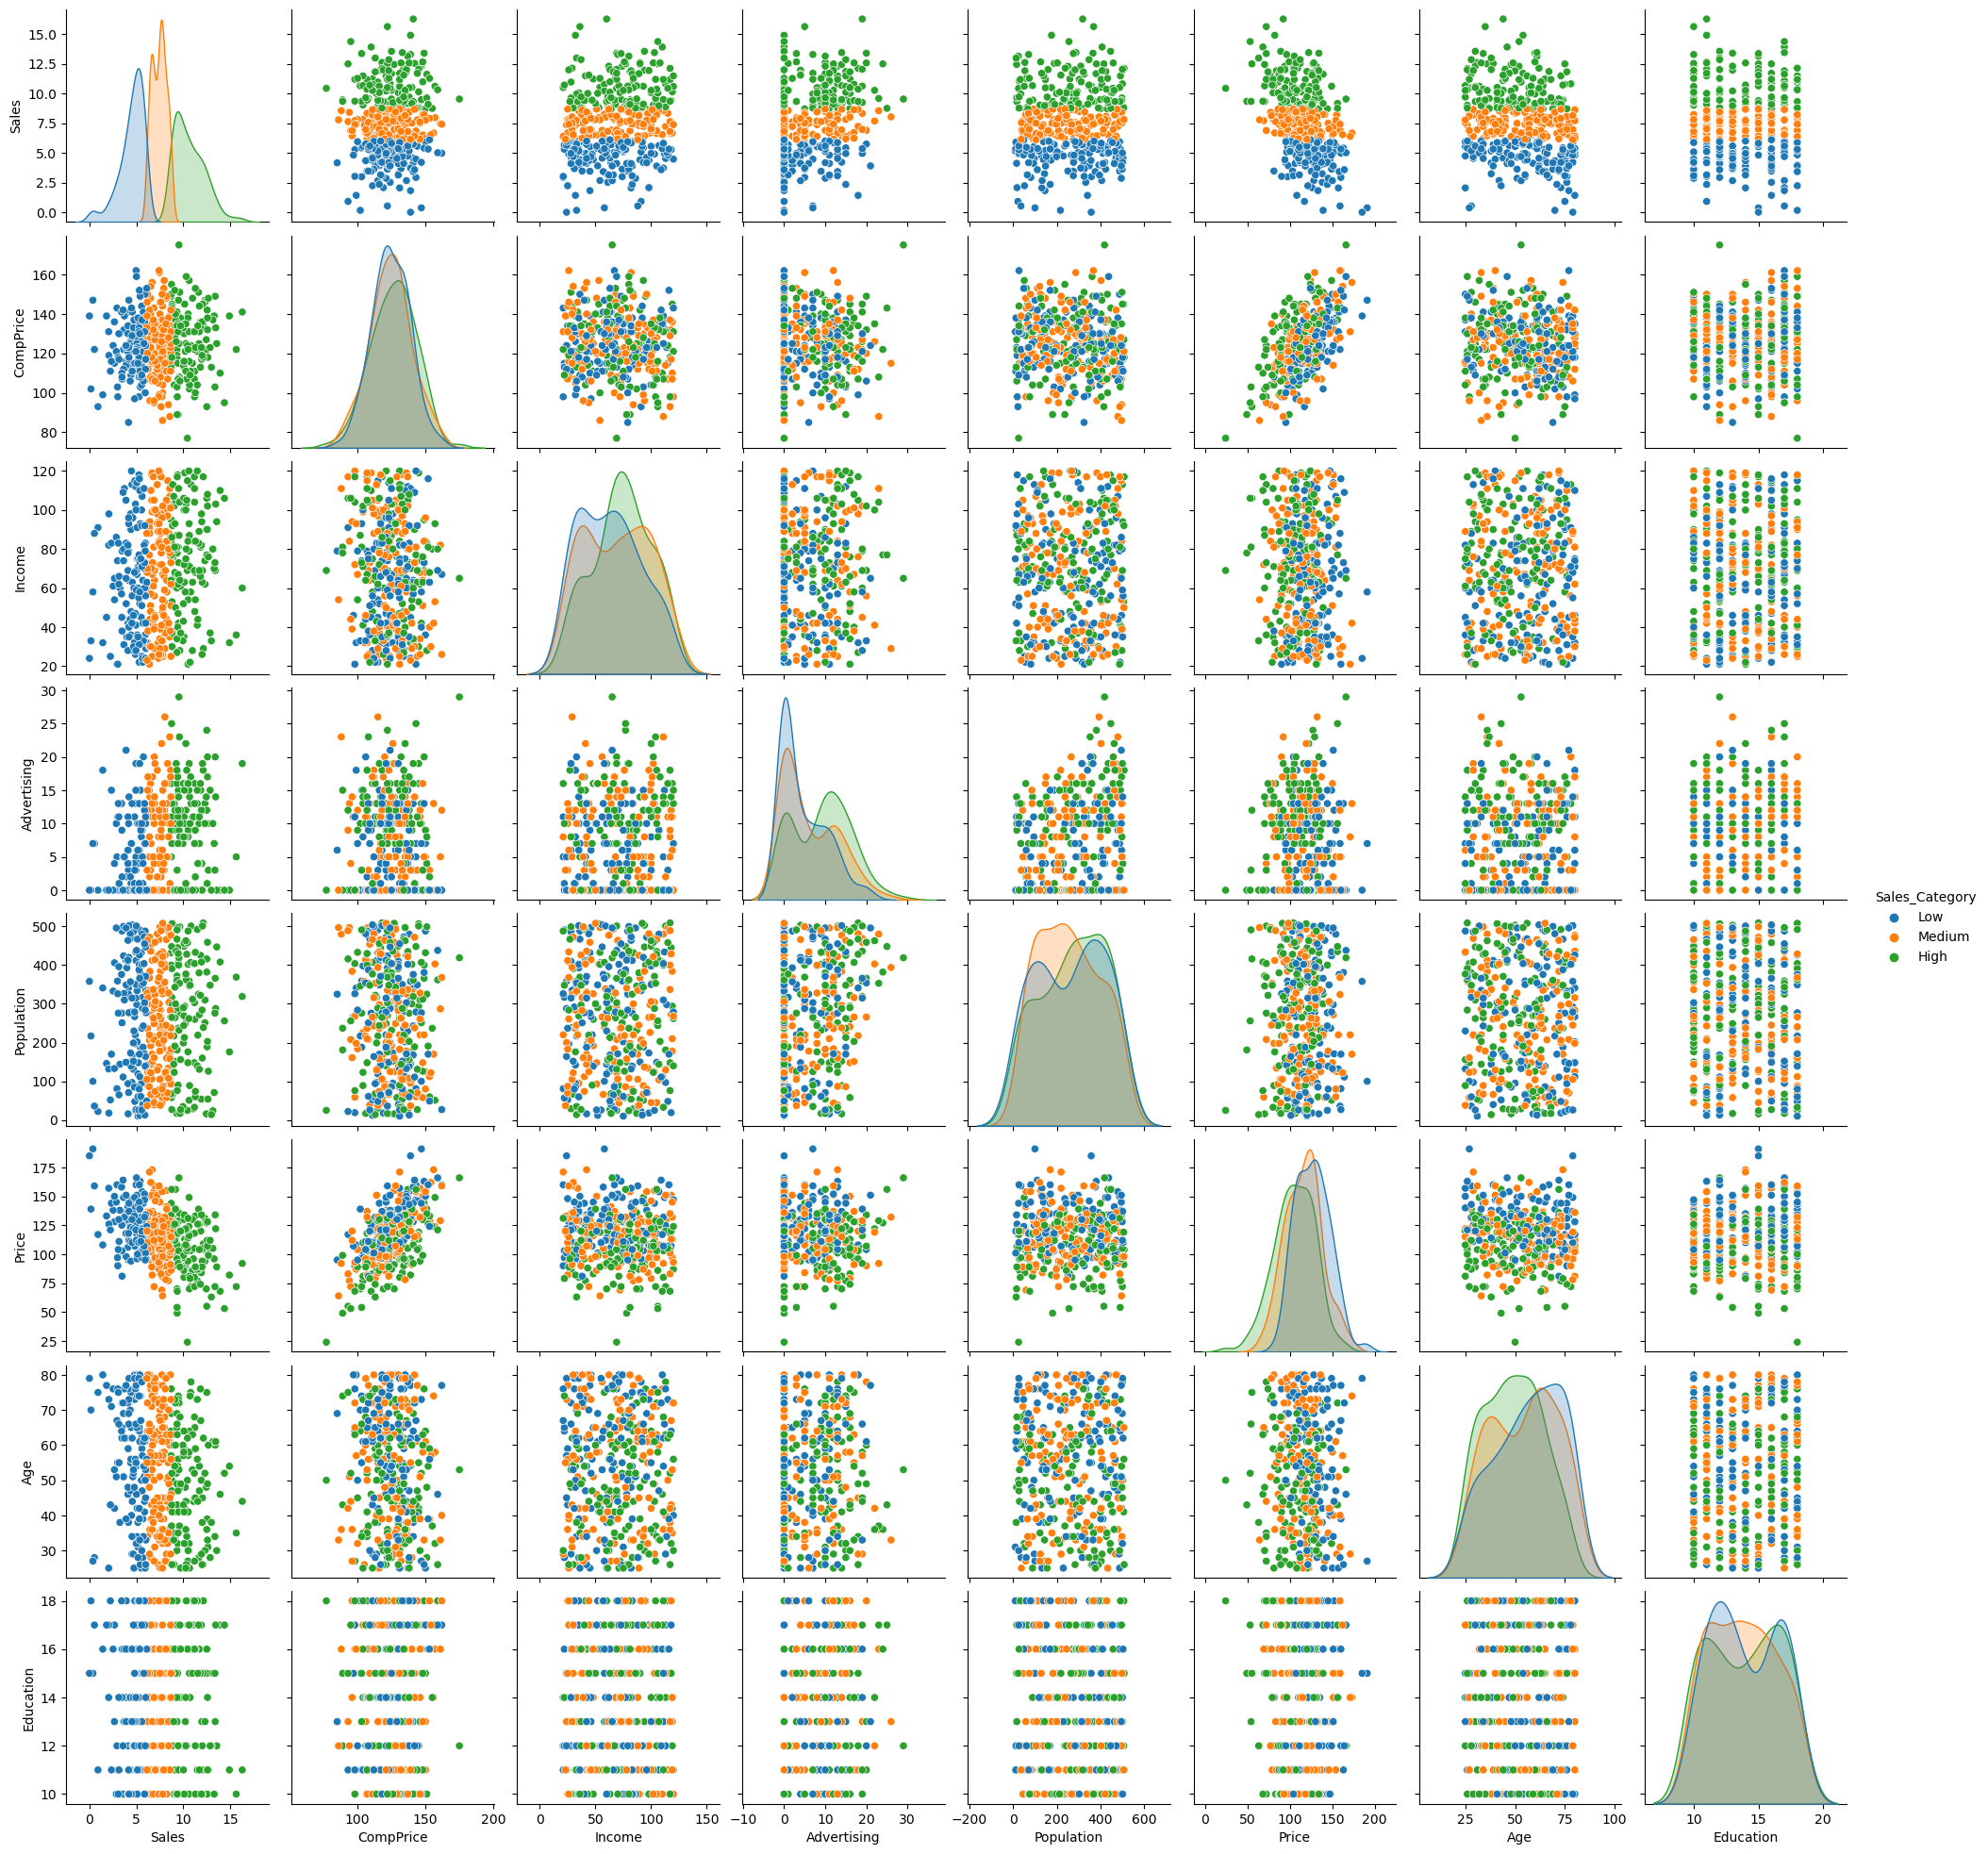

In [22]:
sns.pairplot(data=data1, hue='Sales_Category')

In [23]:
data2 = data1.copy()
data2.drop('Sales', axis=1, inplace=True)
data2 = pd.get_dummies(data2.iloc[:, :-1])
data2.head()

CompPrice  Income  Advertising  Population  Price  Age  Education  \
0        138      73           11         276    120   42         17   
1        111      48           16         260     83   65         10   
2        113      35           10         269     80   59         12   
3        117     100            4         466     97   55         14   
4        141      64            3         340    128   38         13   

   ShelveLoc_Bad  ShelveLoc_Good  ShelveLoc_Medium  Urban_No  Urban_Yes  \
0              1               0                 0         0          1   
1              0               1                 0         0          1   
2              0               0                 1         0          1   
3              0               0                 1         0          1   
4              1               0                 0         0          1   

   US_No  US_Yes  
0      0       1  
1      0       1  
2      0       1  
3      0       1  
4      1       0

Text(0.5, 1.0, 'Correlation with Sales')

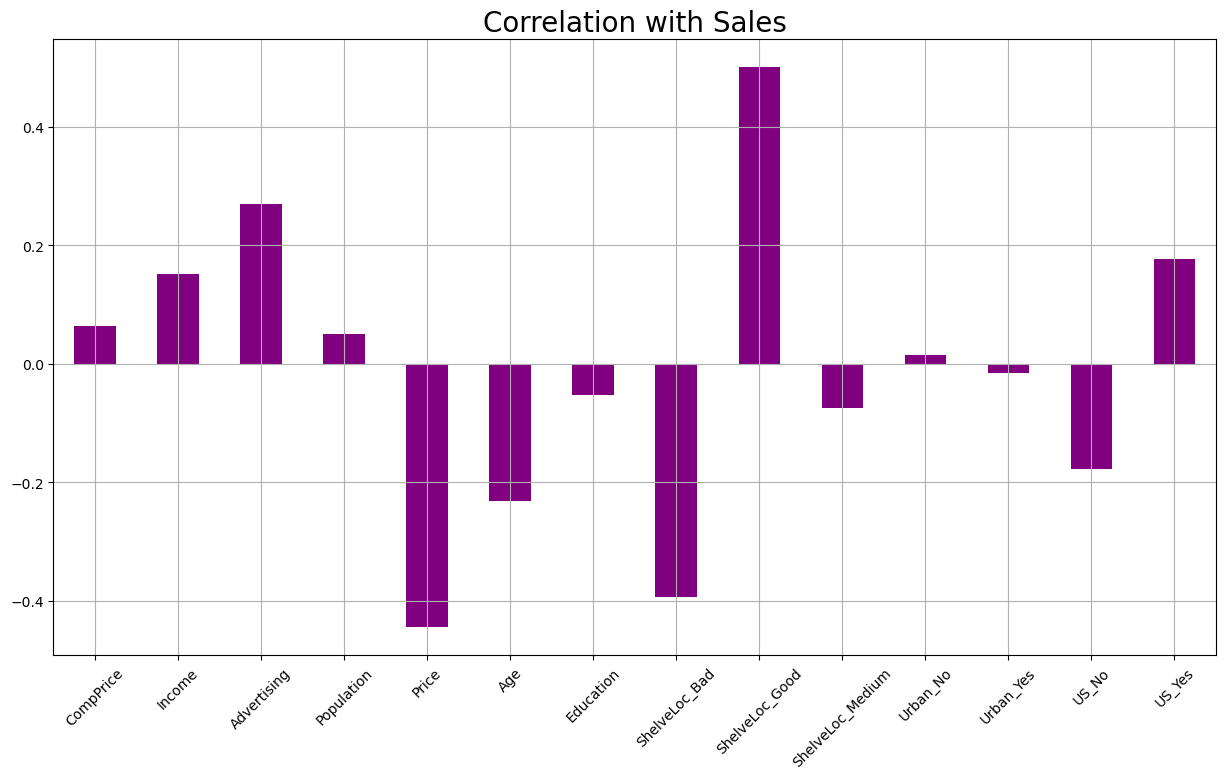

In [24]:
correlations = data2.corrwith(data1.Sales)
correlations = correlations[correlations != 1]

positive_correlations = correlations[correlations >0].sort_values(ascending = False)
negative_correlations =correlations[correlations<0].sort_values(ascending = False)

correlations.plot.bar(figsize = (15, 8), 
                     fontsize = 10,
                     color = 'purple',
                     rot = 45,
                     grid = True)
plt.title('Correlation with Sales', horizontalalignment='center', fontstyle='normal', fontsize='20')

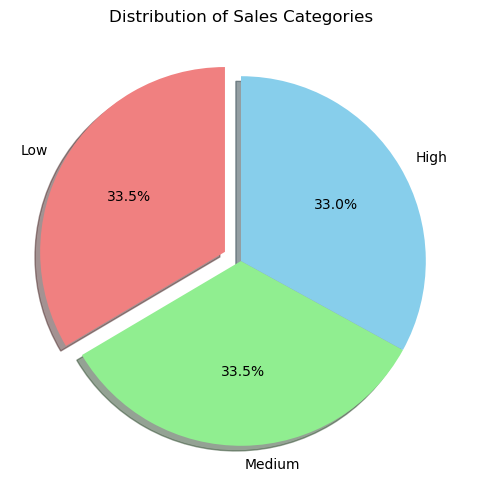

In [25]:
sales_category_counts = data1['Sales_Category'].value_counts()
explode = (0.1, 0, 0)

plt.figure(figsize=(10, 6))
plt.pie(sales_category_counts, labels=sales_category_counts.index, autopct='%1.1f%%', startangle=90, explode=explode, shadow=True, colors=['lightcoral', 'lightgreen', 'skyblue'])
plt.title('Distribution of Sales Categories')
plt.show()

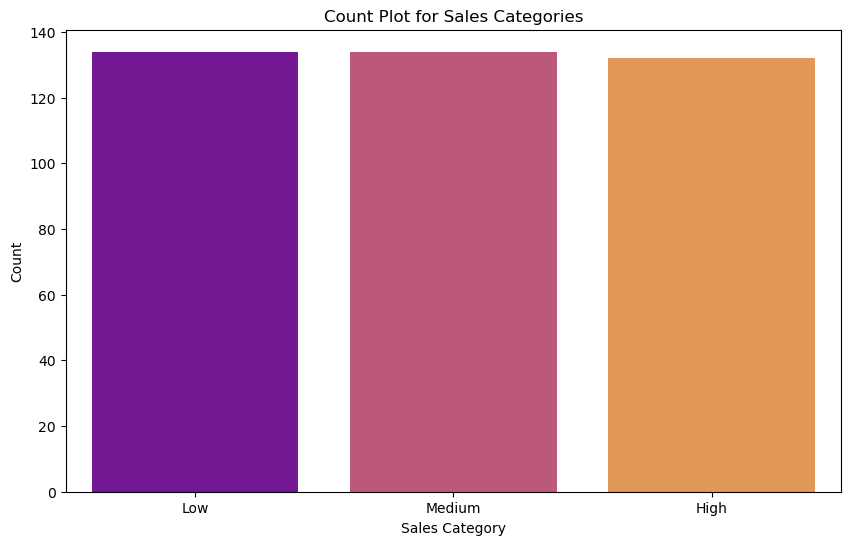

In [26]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Sales_Category', data=data1, palette='plasma')
plt.title('Count Plot for Sales Categories')
plt.xlabel('Sales Category')
plt.ylabel('Count')
plt.show()

In [27]:
data2['Sales'] = data1.Sales_Category
data2.head()

CompPrice  Income  Advertising  Population  Price  Age  Education  \
0        138      73           11         276    120   42         17   
1        111      48           16         260     83   65         10   
2        113      35           10         269     80   59         12   
3        117     100            4         466     97   55         14   
4        141      64            3         340    128   38         13   

   ShelveLoc_Bad  ShelveLoc_Good  ShelveLoc_Medium  Urban_No  Urban_Yes  \
0              1               0                 0         0          1   
1              0               1                 0         0          1   
2              0               0                 1         0          1   
3              0               0                 1         0          1   
4              1               0                 0         0          1   

   US_No  US_Yes   Sales  
0      0       1    High  
1      0       1    High  
2      0       1    High  
3      0       1  Medium  
4      1       0     Low

In [28]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
le = LabelEncoder()
le.fit(data2['Sales'])
data2['Sales']=le.transform(data2['Sales'])
data2.head()

CompPrice  Income  Advertising  Population  Price  Age  Education  \
0        138      73           11         276    120   42         17   
1        111      48           16         260     83   65         10   
2        113      35           10         269     80   59         12   
3        117     100            4         466     97   55         14   
4        141      64            3         340    128   38         13   

   ShelveLoc_Bad  ShelveLoc_Good  ShelveLoc_Medium  Urban_No  Urban_Yes  \
0              1               0                 0         0          1   
1              0               1                 0         0          1   
2              0               0                 1         0          1   
3              0               0                 1         0          1   
4              1               0                 0         0          1   

   US_No  US_Yes  Sales  
0      0       1      0  
1      0       1      0  
2      0       1      0  
3      0       1      2  
4      1       0      1

In [29]:
X = data2.iloc[:, :-1]
Y = data2.Sales

In [30]:
from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest, chi2

In [31]:
#feature extraction
test = SelectKBest(score_func=chi2, k=4)
fit=test.fit(X, Y)

In [32]:
#Summarize scores
scores = fit.scores_
features = fit.transform(X)

In [33]:
score_df = pd.DataFrame(list(zip(scores, X.columns)),
                       columns = ['Score', 'Feature'])
score_df.sort_values(by='Score', ascending=False, inplace=True)
score_df

Score           Feature
4   266.429829             Price
2   214.214334       Advertising
1   108.798000            Income
3    95.283664        Population
5    77.174278               Age
8    67.668742    ShelveLoc_Good
7    48.868461     ShelveLoc_Bad
12    7.706015             US_No
9     4.638553  ShelveLoc_Medium
13    4.241295            US_Yes
0     3.146893         CompPrice
10    0.175302          Urban_No
6     0.155794         Education
11    0.073353         Urban_Yes

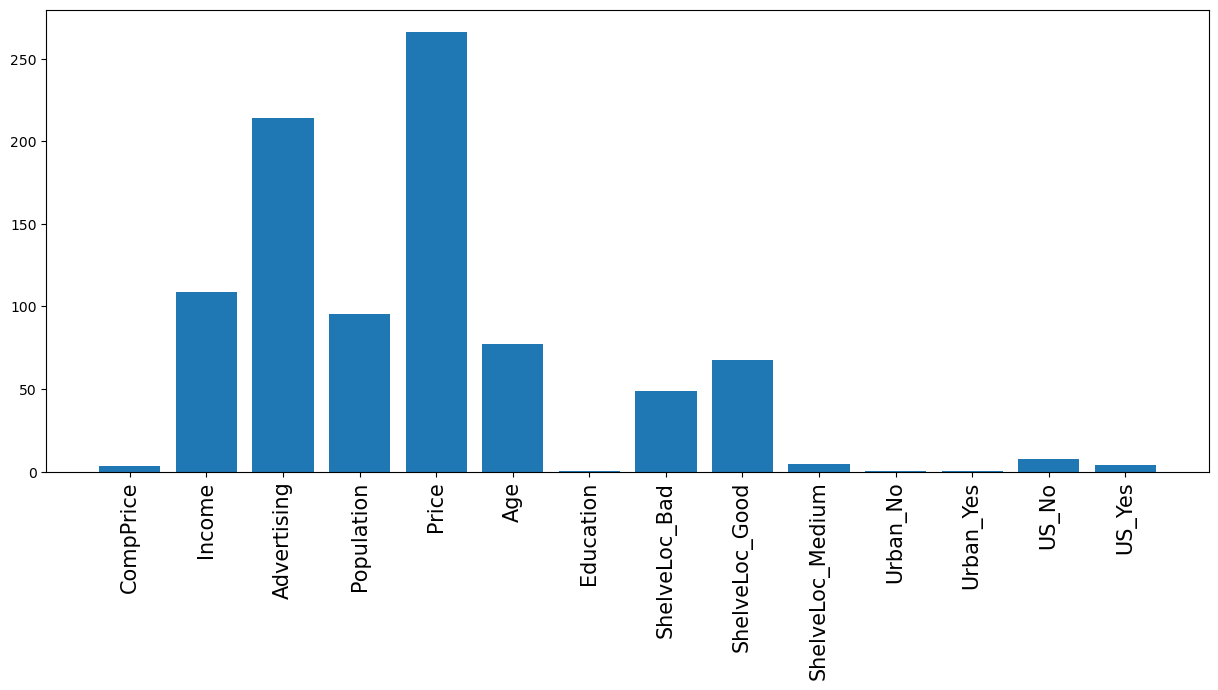

In [34]:
fig, axes = plt.subplots(figsize=(15, 6))
plt.bar([i for i in range(len(scores))],scores)
axes.set_xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13])
axes.set_xticklabels(X.columns.values)
plt.xticks(rotation = 90, size = 15)
plt.show()

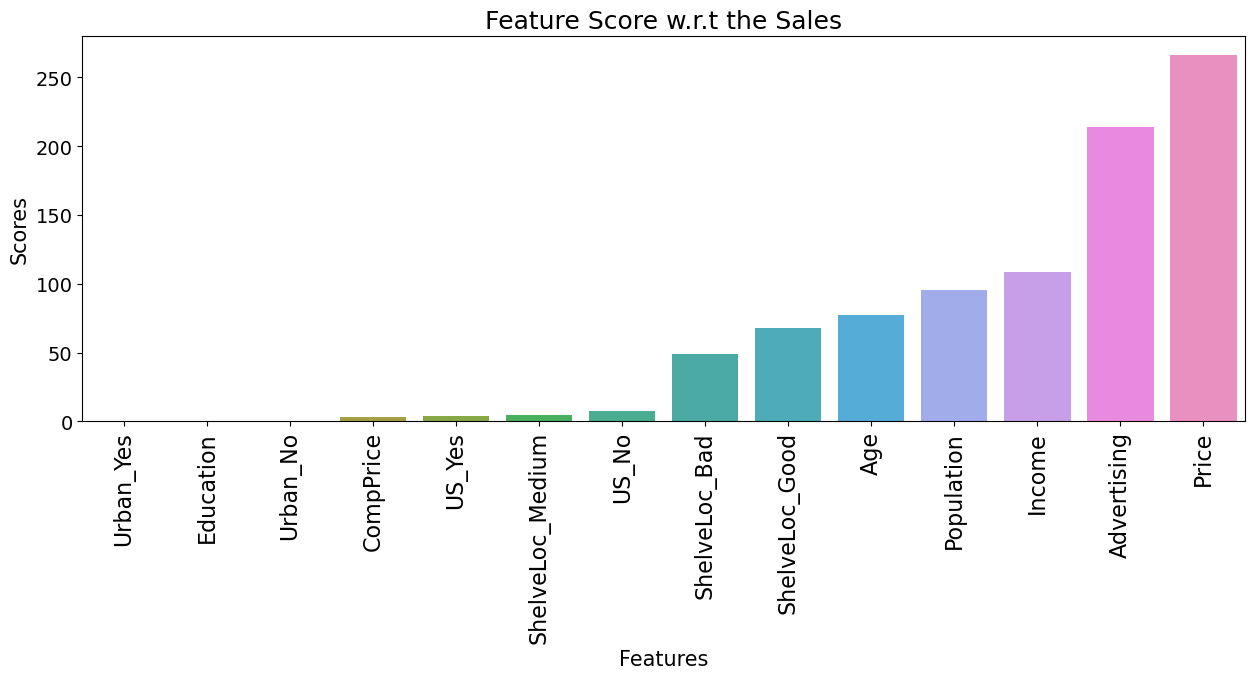

In [35]:
plt.figure(figsize=(15, 5))
sns.barplot(x='Feature', y='Score', data=score_df, order=score_df.sort_values('Score').Feature)

plt.xlabel('Features', size=15)
plt.ylabel('Scores', size=15)
plt.yticks(rotation = 0, fontsize = 14)
plt.xticks(rotation = 90, fontsize = 16)
plt.title("Feature Score w.r.t the Sales", size=18)
plt.show()

In [36]:
model_data = data2[['Price', 'Advertising','Population', 'Income', 'Age', 'ShelveLoc_Good', 'ShelveLoc_Bad', 'ShelveLoc_Medium','Sales']]
model_data.head()

Price  Advertising  Population  Income  Age  ShelveLoc_Good  ShelveLoc_Bad  \
0    120           11         276      73   42               0              1   
1     83           16         260      48   65               1              0   
2     80           10         269      35   59               0              0   
3     97            4         466     100   55               0              0   
4    128            3         340      64   38               0              1   

   ShelveLoc_Medium  Sales  
0                 0      0  
1                 0      0  
2                 1      0  
3                 1      2  
4                 0      1

In [37]:
from sklearn.model_selection import GridSearchCV

In [38]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)

In [39]:
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [40]:
rf_model = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(rf_model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 150]},
             scoring='accuracy')

In [41]:
print("Best Parameters: ", grid_search.best_params_)

Best Parameters:  {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [42]:
Y_pred_train = grid_search.predict(X_train)
Y_pred_test = grid_search.predict(X_test)

In [43]:
from sklearn.metrics import classification_report
print("Training Classification Report:\n", classification_report(Y_train, Y_pred_train))
conf_matrix_train = confusion_matrix(Y_train, Y_pred_train)
conf_matrix_train

Training Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       106
           1       1.00      1.00      1.00       107
           2       1.00      1.00      1.00       107

    accuracy                           1.00       320
   macro avg       1.00      1.00      1.00       320
weighted avg       1.00      1.00      1.00       320



array([[106,   0,   0],
       [  0, 107,   0],
       [  0,   0, 107]], dtype=int64)

In [44]:
print("Testing Classification Report:\n", classification_report(Y_test, Y_pred_test))
conf_matrix_test = confusion_matrix(Y_test, Y_pred_test)
conf_matrix_test

Testing Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.81      0.81        26
           1       0.67      0.74      0.70        27
           2       0.50      0.44      0.47        27

    accuracy                           0.66        80
   macro avg       0.66      0.66      0.66        80
weighted avg       0.66      0.66      0.66        80



array([[21,  0,  5],
       [ 0, 20,  7],
       [ 5, 10, 12]], dtype=int64)

In [45]:
accuracy_df = pd.DataFrame(columns=['Dataset', 'Accuracy'])
accuracy_df = accuracy_df.append({'Dataset': 'Training', 'Accuracy': accuracy_score(Y_train, Y_pred_train)}, ignore_index=True)
accuracy_df = accuracy_df.append({'Dataset': 'Testing', 'Accuracy': accuracy_score(Y_test, Y_pred_test)}, ignore_index=True)

In [46]:
accuracy_df

Dataset Accuracy
0  Training      1.0
1   Testing   0.6625